# 2D Optics Tutorial: Interband absorption spectrum of a GaAs cylindrical quantum wire

**Authors: Naoki Mitsui (simulation), Brandon Loke (write-up and visualisations)**

This tutorial calculates the optical spectrum of a GaAs cylindrical quantum wire with infinite barriers.


In [1]:
import nextnanopy as nn
import numpy as np
import matplotlib.pyplot as plt
import os, pathlib
import re
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

## Initialise the filepaths

We need both kp8 and single band calculations to plot the figures. The variables have been changed in their respective inputfiles.

In [2]:
inputpath_kp8 = r'D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_kp8.in'
inputfile_kp8 = nn.InputFile(inputpath_kp8)
inputpath_single = r'D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_singleband.in'
inputfile_single = nn.InputFile(inputpath_single)

In [3]:
software = inputfile_kp8.product
software

'nextnano++'

In [4]:
inputfile_kp8.execute()

STARTING...
Starting execution as:
C:\Program Files\nextnano\2021_12_24\nextnano++\bin 64bit\nextnano++_Intel_64bit.exe --license C:\Users\brandon.loke\Documents\nextnano\License\License_nnp.lic --database C:\Program Files\nextnano\2021_12_24\nextnano++\Syntax\database_nnp.in --threads 0 --outputdirectory D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_kp8 --noautooutdir D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_kp8.in 

nextnano++ (1.9.3 - 2021.122001) Jan 25 2022
COPYRIGHT NOTICE                                                             
Please read the file 'copyright_nextnano++.txt' in your installation folder  
for further information about the terms of copyright of the nextnano++ code  
and of third party source codes and libraries used in the nextnano++ code.   
                                                                             
In case this file is missing or seems incomplete or corrupted, please contact
nex

   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.288019488) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.345623386) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.403227283) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   Computing approx. (subspace) spectrum for k = (0,0,0.460831181) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:      

   E_p - intraband: 25 32 2.46741956
   E_p - intraband: 26 31 2.46741947
   E_p - intraband: 26 32 7.48372971
   E_p - intraband: 27 33 1.63788139
   E_p - intraband: 27 34 1.56326953
   E_p - intraband: 27 35 1.25034313
   E_p - intraband: 27 36 1.0153599
   E_p - intraband: 28 33 1.56326642
   E_p - intraband: 28 34 1.63787174
   E_p - intraband: 28 35 1.01536267
   E_p - intraband: 28 36 1.25035312
   E_p - intraband: 29 31 2.87412637
   E_p - intraband: 30 32 2.8741263


Optics diagnostic output - bulk operator:
z ((0,0),(0,0),(1,0)):
+k3*S+S*k3	0      	+k2*B	+k1*B	+iP	0      	0      	0      	
0      	+k3*S+S*k3	0      	0      	0      	+k2*B	+k1*B	+iP	
+B*k2	0      	+k3*m0+m0*k3+k3*M+M*k3	0      	-k1*M+M*k1+k1*NP+NM*k1	0      	0      	0      	
+B*k1	0      	0      	+k3*m0+m0*k3+k3*M+M*k3	-k2*M+M*k2+k2*NP+NM*k2	0      	0      	0      	
-iP	0      	+k1*M-M*k1+NP*k1+k1*NM	+k2*M-M*k2+NP*k2+k2*NM	+k3*m0+m0*k3+k3*L+L*k3	0      	0      	0      	
0      	+B*k2	0      	0      	0      	+k3*

   E_p - intraband: 21 38 2.31668608
   E_p - intraband: 21 49 2.19176267
   E_p - intraband: 21 58 1.50298335
   E_p - intraband: 22 36 1.29805411
   E_p - intraband: 22 37 1.11767265
   E_p - intraband: 23 48 1.84670349
   E_p - intraband: 24 47 2.32783425
   E_p - intraband: 24 50 1.44803639
   E_p - intraband: 24 57 1.07510701
   E_p - intraband: 25 33 6.08926756
   E_p - intraband: 25 36 2.15116596
   E_p - intraband: 25 46 1.27167613
   E_p - intraband: 25 47 1.6145074
   E_p - intraband: 26 34 3.3480863
   E_p - intraband: 27 35 4.0918571
   E_p - intraband: 28 31 1.0237179
   E_p - intraband: 28 33 1.51546309
   E_p - intraband: 28 36 3.12278182
   E_p - intraband: 28 37 3.26320217
   E_p - intraband: 28 40 3.19976469
   E_p - intraband: 29 32 13.7978802
   E_p - intraband: 29 38 1.23340956
   E_p - intraband: 30 31 3.55401141

   E_p - intraband: 1 35 4.21772562
   E_p - intraband: 2 33 1.27691154
   E_p - intraband: 4 34 4.78769819
   E_p - intraband: 4 39 1.71738478
   E_p -

   E_p - intraband: 8 31 2.66216132
   E_p - intraband: 9 41 1.24413208
   E_p - intraband: 9 49 1.18533042
   E_p - intraband: 10 47 2.39085037
   E_p - intraband: 11 36 1.06914197
   E_p - intraband: 11 42 1.61674451
   E_p - intraband: 11 50 1.3821024
   E_p - intraband: 13 40 1.11743538
   E_p - intraband: 13 50 1.05454059
   E_p - intraband: 14 34 1.04311966
   E_p - intraband: 16 45 1.19884981
   E_p - intraband: 16 49 1.86096205
   E_p - intraband: 17 40 1.41816964
   E_p - intraband: 18 58 5.31014575
   E_p - intraband: 19 51 1.34763486
   E_p - intraband: 20 57 5.30133085
   E_p - intraband: 21 48 1.96314935
   E_p - intraband: 21 49 2.02308225
   E_p - intraband: 22 47 2.7266602
   E_p - intraband: 23 35 1.59260963
   E_p - intraband: 23 39 1.9910794
   E_p - intraband: 24 33 1.47339494
   E_p - intraband: 24 37 4.26201793
   E_p - intraband: 24 50 1.9680591
   E_p - intraband: 25 33 3.23626718
   E_p - intraband: 26 34 6.51825434
   E_p - intraband: 26 35 1.92164451
   E_p -

   E_p - intraband: 26 34 6.89865438
   E_p - intraband: 26 35 1.08604443
   E_p - intraband: 26 48 1.67883956
   E_p - intraband: 27 34 1.01237743
   E_p - intraband: 27 35 7.46262708
   E_p - intraband: 27 38 2.55211711
   E_p - intraband: 28 36 3.32958625
   E_p - intraband: 28 37 1.02047625
   E_p - intraband: 29 32 4.03158265
   E_p - intraband: 30 31 13.0901862

   E_p - intraband: 25 41 1.5252301
   E_p - intraband: 26 42 1.52671642
   E_p - intraband: 29 33 1.53336574
   E_p - intraband: 30 34 1.53307237

   Computing approx. (subspace) multi-band states for k = (-0,-0,-0.766131839) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.37633967
   E_p - intraband: 1 35 1.13063131
   E_p - intraband: 2 36 4.73712069
   E_p - intraband: 2 40 1.11890648
   E_p - intraband: 3 38 1.50787167
   E_p - intraband: 4 33 5.87535356
   E_p - intraband: 4 37 1.580599

   E_p - intraband: 19 38 1.25651486
   E_p - intraband: 20 37 1.25660894
   E_p - intraband: 23 36 1.13357509
   E_p - intraband: 24 35 1.13380794
   E_p - intraband: 25 39 1.76813139
   E_p - intraband: 26 40 1.76662083
   E_p - intraband: 27 31 1.10240398
   E_p - intraband: 28 32 1.10237926
   E_p - intraband: 29 33 2.00736995
   E_p - intraband: 30 34 2.00708969

   Computing approx. (subspace) multi-band states for k = (-0,-0,-0.656684433) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.59229312
   E_p - intraband: 1 35 1.76380265
   E_p - intraband: 2 36 4.25079646
   E_p - intraband: 2 37 1.35367746
   E_p - intraband: 3 38 1.54897486
   E_p - intraband: 4 33 5.82081638
   E_p - intraband: 4 36 1.10802674
   E_p - intraband: 4 37 1.08726842
   E_p - intraband: 5 31 1.74874265
   E_p - intraband: 5 40 1.11600963
   E_p - intraband: 6 32 2.202658
   

   E_p - intraband: 5 34 2.27098743
   E_p - intraband: 6 33 2.27121161
   E_p - intraband: 11 32 1.52445007
   E_p - intraband: 12 31 1.52427562
   E_p - intraband: 21 37 1.79826177
   E_p - intraband: 22 38 1.79304596
   E_p - intraband: 23 36 1.84532947
   E_p - intraband: 23 41 1.56171457
   E_p - intraband: 24 35 1.84602266
   E_p - intraband: 24 42 1.5611263
   E_p - intraband: 25 39 2.71040352
   E_p - intraband: 26 40 2.71216113
   E_p - intraband: 27 31 1.89131463
   E_p - intraband: 28 32 1.89120328
   E_p - intraband: 29 33 2.52859744
   E_p - intraband: 30 34 2.52832081

   Computing approx. (subspace) multi-band states for k = (-0,-0,-0.547237028) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 2.581576
   E_p - intraband: 1 35 2.47628719
   E_p - intraband: 2 36 3.8891083
   E_p - intraband: 2 37 1.68810301
   E_p - intraband: 3 38 1.53030718
 

   E_p - intraband: 24 33 1.19916924
   E_p - intraband: 24 37 4.70768944
   E_p - intraband: 25 33 2.97537944
   E_p - intraband: 26 34 5.78405892
   E_p - intraband: 26 38 1.45430671
   E_p - intraband: 26 48 1.76446364
   E_p - intraband: 27 32 1.84450521
   E_p - intraband: 27 35 7.10405705
   E_p - intraband: 28 33 1.50077852
   E_p - intraband: 28 36 2.13463434
   E_p - intraband: 29 32 4.79024129
   E_p - intraband: 30 31 11.1811576

   E_p - intraband: 1 36 2.68343663
   E_p - intraband: 2 35 2.68250246
   E_p - intraband: 3 36 1.52661165
   E_p - intraband: 3 40 2.74344812
   E_p - intraband: 4 35 1.52661022
   E_p - intraband: 4 39 2.74214618
   E_p - intraband: 5 34 2.27610315
   E_p - intraband: 6 33 2.27259927
   E_p - intraband: 17 32 1.20299801
   E_p - intraband: 18 31 1.2018838
   E_p - intraband: 21 37 2.46061014
   E_p - intraband: 22 38 2.45825798
   E_p - intraband: 23 36 2.63962547
   E_p - intraband: 23 41 2.01934595
   E_p - intraband: 24 35 2.64112811
   E_p - 

   E_p - intraband: 6 47 1.4790228
   E_p - intraband: 7 50 1.05223531
   E_p - intraband: 9 36 1.71418492
   E_p - intraband: 9 51 1.18231006
   E_p - intraband: 10 58 2.60914783
   E_p - intraband: 11 32 1.24197359
   E_p - intraband: 12 36 1.28737607
   E_p - intraband: 12 57 3.03980214
   E_p - intraband: 13 35 1.02055938
   E_p - intraband: 13 58 2.76383666
   E_p - intraband: 14 31 1.22359383
   E_p - intraband: 14 57 1.44202072
   E_p - intraband: 15 47 3.17103396
   E_p - intraband: 15 57 1.54431217
   E_p - intraband: 16 49 2.60692229
   E_p - intraband: 17 33 1.09450629
   E_p - intraband: 17 46 1.13095045
   E_p - intraband: 17 50 2.17433303
   E_p - intraband: 18 34 1.35979756
   E_p - intraband: 18 45 2.00205293
   E_p - intraband: 18 48 2.09281313
   E_p - intraband: 19 31 3.12402139
   E_p - intraband: 19 41 2.65182883
   E_p - intraband: 20 38 1.87956628
   E_p - intraband: 20 58 1.05514673
   E_p - intraband: 21 37 2.11576038
   E_p - intraband: 21 40 1.03941556
   E_p

      
   E_p - intraband: 1 35 4.95195031
   E_p - intraband: 2 36 3.69665718
   E_p - intraband: 2 37 1.53825726
   E_p - intraband: 3 34 1.5640694
   E_p - intraband: 3 38 1.14830679
   E_p - intraband: 4 33 4.06536516
   E_p - intraband: 4 36 1.08072399
   E_p - intraband: 5 48 1.34803217
   E_p - intraband: 6 33 1.18692577
   E_p - intraband: 9 57 3.43778443
   E_p - intraband: 10 52 1.86080457
   E_p - intraband: 11 58 4.48791927
   E_p - intraband: 12 57 1.78919653
   E_p - intraband: 13 35 1.27387691
   E_p - intraband: 13 49 2.04214754
   E_p - intraband: 14 47 1.28620818
   E_p - intraband: 15 50 2.16217526
   E_p - intraband: 16 48 3.66619905
   E_p - intraband: 16 58 1.0335324
   E_p - intraband: 17 33 1.99649748
   E_p - intraband: 17 44 1.29067053
   E_p - intraband: 18 34 1.89262205
   E_p - intraband: 19 32 1.45739928
   E_p - intraband: 19 35 1.11166445
   E_p - intraband: 19 38 1.6198436
   E_p - intraband: 19 39 1.21765208
   E_p - intraband: 20 31 2.34328695
   E_p 

   E_p - intraband: 5 40 2.73759982
   E_p - intraband: 6 39 2.72228066
   E_p - intraband: 7 36 1.56303932
   E_p - intraband: 8 35 1.5667743
   E_p - intraband: 13 49 1.11882987
   E_p - intraband: 14 50 1.11711383
   E_p - intraband: 15 34 1.64662651
   E_p - intraband: 16 33 1.64019782
   E_p - intraband: 17 34 1.89699331
   E_p - intraband: 17 39 2.82547607
   E_p - intraband: 18 33 1.89437507
   E_p - intraband: 18 40 2.8224618
   E_p - intraband: 19 41 1.38363238
   E_p - intraband: 20 42 1.38565822
   E_p - intraband: 21 38 2.04983395
   E_p - intraband: 21 42 1.4655343
   E_p - intraband: 22 37 2.04535163
   E_p - intraband: 22 41 1.46789512
   E_p - intraband: 23 34 1.03270397
   E_p - intraband: 23 38 1.30226555
   E_p - intraband: 23 39 1.13365899
   E_p - intraband: 23 43 1.01499039
   E_p - intraband: 24 33 1.03037317
   E_p - intraband: 24 37 1.30137327
   E_p - intraband: 24 40 1.13660948
   E_p - intraband: 24 44 1.00977263
   E_p - intraband: 25 31 2.45899285
   E_p -

   E_p - intraband: 7 34 2.51308292
   E_p - intraband: 8 33 1.57097258
   E_p - intraband: 8 37 1.20085613
   E_p - intraband: 8 57 1.4788904
   E_p - intraband: 9 36 1.62427009
   E_p - intraband: 9 51 1.51809642
   E_p - intraband: 10 35 1.01059134
   E_p - intraband: 10 58 4.59212563
   E_p - intraband: 11 52 1.31000645
   E_p - intraband: 12 57 3.40229792
   E_p - intraband: 13 36 2.04433003
   E_p - intraband: 13 47 1.23474119
   E_p - intraband: 13 50 1.29836721
   E_p - intraband: 14 34 1.20371115
   E_p - intraband: 14 35 2.36288263
   E_p - intraband: 14 43 1.83608892
   E_p - intraband: 15 48 1.67503243
   E_p - intraband: 15 49 2.10195811
   E_p - intraband: 16 47 3.16493058
   E_p - intraband: 17 33 1.76533593
   E_p - intraband: 17 45 1.07596621
   E_p - intraband: 17 50 1.48930026
   E_p - intraband: 18 35 2.70214871
   E_p - intraband: 18 48 1.08146197
   E_p - intraband: 18 49 1.59144163
   E_p - intraband: 19 32 1.03156653
   E_p - intraband: 19 38 2.334514
   E_p - i

   E_p - intraband: 29 32 13.4796428
   E_p - intraband: 30 31 13.479176

   Computing approx. (subspace) multi-band states for k = (0,0,0.0547237028) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 1.40965162
   E_p - intraband: 2 33 1.72986686
   E_p - intraband: 3 34 2.67664377
   E_p - intraband: 3 35 1.00257991
   E_p - intraband: 4 33 2.40664349
   E_p - intraband: 5 33 2.60376973
   E_p - intraband: 6 34 1.076374
   E_p - intraband: 7 58 1.98658732
   E_p - intraband: 8 33 1.11101734
   E_p - intraband: 9 36 1.65725873
   E_p - intraband: 9 57 4.4184252
   E_p - intraband: 10 35 2.0367781
   E_p - intraband: 10 52 1.01570607
   E_p - intraband: 10 58 1.304346
   E_p - intraband: 11 58 1.73841684
   E_p - intraband: 12 37 1.02655585
   E_p - intraband: 12 51 1.16875995
   E_p - intraband: 13 36 4.32037881
   E_p - intraband: 13 44 1.4804307
   E_p - in

   E_p - intraband: 26 33 3.90134556
   E_p - intraband: 27 32 5.65739686
   E_p - intraband: 27 34 1.00670051
   E_p - intraband: 27 35 1.92366131
   E_p - intraband: 28 31 2.82265091
   E_p - intraband: 28 33 1.61775886
   E_p - intraband: 29 31 2.69548613
   E_p - intraband: 30 32 2.97459478
   E_p - intraband: 30 35 1.3858058

   E_p - intraband: 1 33 2.50903223
   E_p - intraband: 2 34 2.54195949
   E_p - intraband: 3 34 1.20341857
   E_p - intraband: 4 33 1.18941361
   E_p - intraband: 7 40 3.9874863
   E_p - intraband: 8 39 3.98703032
   E_p - intraband: 11 40 1.95754535
   E_p - intraband: 12 39 1.96031286
   E_p - intraband: 13 39 1.58944789
   E_p - intraband: 13 49 1.5704681
   E_p - intraband: 14 40 1.58808731
   E_p - intraband: 14 50 1.57266166
   E_p - intraband: 17 35 2.79313771
   E_p - intraband: 17 43 1.7442383
   E_p - intraband: 18 36 2.76359549
   E_p - intraband: 18 44 1.75300958
   E_p - intraband: 19 41 3.80572736
   E_p - intraband: 20 42 3.80637082
   E_p - i

   E_p - intraband: 1 38 1.36910365
   E_p - intraband: 2 36 5.39262577
   E_p - intraband: 3 34 1.12261218
   E_p - intraband: 3 35 1.05430712
   E_p - intraband: 5 34 1.55366685
   E_p - intraband: 6 33 1.13126082
   E_p - intraband: 7 34 3.26804093
   E_p - intraband: 8 33 1.01839637
   E_p - intraband: 9 51 1.82869984
   E_p - intraband: 10 58 3.62014087
   E_p - intraband: 11 52 1.03303367
   E_p - intraband: 11 58 1.74471658
   E_p - intraband: 12 57 4.4637545
   E_p - intraband: 13 45 1.11768938
   E_p - intraband: 13 50 2.50952561
   E_p - intraband: 14 34 1.52270427
   E_p - intraband: 14 43 1.46547707
   E_p - intraband: 14 48 1.16921559
   E_p - intraband: 14 49 1.38658924
   E_p - intraband: 15 47 3.24626555
   E_p - intraband: 16 46 1.15683572
   E_p - intraband: 16 48 1.30132567
   E_p - intraband: 16 49 1.41051694
   E_p - intraband: 17 33 2.51804921
   E_p - intraband: 18 34 1.93157021
   E_p - intraband: 18 35 1.18222971
   E_p - intraband: 18 49 1.26052308
   E_p - in

   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 34 1.51847378
   E_p - intraband: 1 35 4.38335068
   E_p - intraband: 2 36 3.76927133
   E_p - intraband: 2 37 1.66254637
   E_p - intraband: 3 34 1.63459161
   E_p - intraband: 3 38 1.38059084
   E_p - intraband: 4 33 5.09824441
   E_p - intraband: 4 36 1.1441648
   E_p - intraband: 5 48 1.39939875
   E_p - intraband: 9 57 3.38436175
   E_p - intraband: 10 52 1.7864598
   E_p - intraband: 11 35 1.07426421
   E_p - intraband: 11 58 4.33463694
   E_p - intraband: 12 57 1.09736783
   E_p - intraband: 13 32 1.40668154
   E_p - intraband: 13 35 1.25298067
   E_p - intraband: 14 31 1.11768463
   E_p - intraband: 15 50 2.5744773
   E_p - intraband: 16 48 3.5166516
   E_p - intraband: 16 58 1.25195384
   E_p - intraband: 17 33 1.68208917
   E_p - intraband: 17 46 1.69275496
   E_p - intraband: 17 47 1.50379398
   E_p - intraban

   E_p - intraband: 26 33 1.9157312
   E_p - intraband: 26 37 3.37114983
   E_p - intraband: 26 41 1.22883503
   E_p - intraband: 27 33 1.46876973
   E_p - intraband: 27 36 1.68465488
   E_p - intraband: 28 32 2.62989185
   E_p - intraband: 28 35 5.65660484
   E_p - intraband: 29 32 4.84762206
   E_p - intraband: 30 31 10.6607786

   E_p - intraband: 1 36 3.27457521
   E_p - intraband: 2 35 3.27512294
   E_p - intraband: 3 36 1.87558327
   E_p - intraband: 3 40 3.35897807
   E_p - intraband: 4 35 1.8760005
   E_p - intraband: 4 39 3.35783179
   E_p - intraband: 9 34 1.30650601
   E_p - intraband: 10 33 1.30702581
   E_p - intraband: 13 33 1.46731565
   E_p - intraband: 14 34 1.46985943
   E_p - intraband: 17 39 1.34348684
   E_p - intraband: 18 40 1.34046547
   E_p - intraband: 19 32 1.27591618
   E_p - intraband: 19 38 1.59355677
   E_p - intraband: 20 31 1.27213809
   E_p - intraband: 20 37 1.59726735
   E_p - intraband: 21 32 1.89476889
   E_p - intraband: 21 38 1.10660225
   E_p - 

   E_p - intraband: 5 31 1.80654878
   E_p - intraband: 5 36 1.64384763
   E_p - intraband: 6 35 1.48602044
   E_p - intraband: 6 39 1.0063528
   E_p - intraband: 8 47 1.27309225
   E_p - intraband: 9 36 1.91857694
   E_p - intraband: 11 52 1.25019212
   E_p - intraband: 11 57 1.12112229
   E_p - intraband: 12 58 1.53564146
   E_p - intraband: 13 58 2.58852626
   E_p - intraband: 14 31 1.27568724
   E_p - intraband: 14 57 1.74076491
   E_p - intraband: 15 49 1.66197454
   E_p - intraband: 16 47 1.82075504
   E_p - intraband: 16 57 3.05187876
   E_p - intraband: 17 33 1.23740034
   E_p - intraband: 17 50 1.93822091
   E_p - intraband: 18 32 1.0543676
   E_p - intraband: 18 45 2.36559943
   E_p - intraband: 18 48 1.7645787
   E_p - intraband: 19 46 1.47014866
   E_p - intraband: 19 47 1.9578556
   E_p - intraband: 19 50 1.15881138
   E_p - intraband: 20 48 1.27513872
   E_p - intraband: 20 49 2.31373019
   E_p - intraband: 20 58 1.00389009
   E_p - intraband: 21 32 1.46751809
   E_p - in

   E_p - intraband: 3 35 1.30461221
   E_p - intraband: 4 37 1.5473623
   E_p - intraband: 5 31 2.14797596
   E_p - intraband: 5 36 3.87405799
   E_p - intraband: 6 32 1.69004676
   E_p - intraband: 6 35 1.04688746
   E_p - intraband: 6 39 1.01963833
   E_p - intraband: 8 47 1.79573364
   E_p - intraband: 11 31 1.56597692
   E_p - intraband: 12 32 1.01226928
   E_p - intraband: 12 38 1.02491001
   E_p - intraband: 13 53 1.21551625
   E_p - intraband: 14 58 2.18342929
   E_p - intraband: 15 51 1.20605961
   E_p - intraband: 15 58 1.8179923
   E_p - intraband: 16 57 5.17467556
   E_p - intraband: 17 47 1.20884253
   E_p - intraband: 17 50 2.27023006
   E_p - intraband: 18 45 2.12055677
   E_p - intraband: 18 48 1.08407107
   E_p - intraband: 18 49 2.31398144
   E_p - intraband: 19 46 1.43770994
   E_p - intraband: 19 47 2.28772057
   E_p - intraband: 19 50 1.49328642
   E_p - intraband: 20 45 1.00333358
   E_p - intraband: 20 48 2.24675352
   E_p - intraband: 20 49 2.10490041
   E_p - in

   E_p - intraband: 1 38 1.09513175
   E_p - intraband: 1 39 1.13195913
   E_p - intraband: 2 33 2.5025033
   E_p - intraband: 2 36 1.4429099
   E_p - intraband: 3 34 5.86380075
   E_p - intraband: 3 38 1.32916661
   E_p - intraband: 4 37 1.53776576
   E_p - intraband: 5 31 2.22869935
   E_p - intraband: 5 36 4.71686944
   E_p - intraband: 6 32 1.72732602
   E_p - intraband: 6 39 1.36788727
   E_p - intraband: 7 32 2.39814899
   E_p - intraband: 8 31 2.25968285
   E_p - intraband: 8 47 1.16715841
   E_p - intraband: 11 50 1.28876383
   E_p - intraband: 13 41 1.47273152
   E_p - intraband: 13 53 1.41593719
   E_p - intraband: 14 58 1.87659158
   E_p - intraband: 15 51 1.22094887
   E_p - intraband: 15 58 2.83500331
   E_p - intraband: 16 57 5.06259335
   E_p - intraband: 17 50 2.36156751
   E_p - intraband: 18 45 1.63438549
   E_p - intraband: 18 49 2.36566346
   E_p - intraband: 19 41 3.63270959
   E_p - intraband: 20 39 2.52176478
   E_p - intraband: 20 58 1.0636214
   E_p - intraband

   E_p - intraband: 7 32 3.3999658
   E_p - intraband: 8 31 2.66796378
   E_p - intraband: 9 49 1.2879788
   E_p - intraband: 10 47 1.98761803
   E_p - intraband: 11 50 1.88270689
   E_p - intraband: 13 42 1.41180551
   E_p - intraband: 13 53 1.20115173
   E_p - intraband: 14 39 1.00894456
   E_p - intraband: 14 58 1.26956767
   E_p - intraband: 15 50 1.65535991
   E_p - intraband: 16 45 1.7689332
   E_p - intraband: 16 48 1.14193613
   E_p - intraband: 16 49 1.89005427
   E_p - intraband: 17 58 3.27150321
   E_p - intraband: 18 57 3.84216403
   E_p - intraband: 19 39 1.05757911
   E_p - intraband: 19 58 1.08471035
   E_p - intraband: 20 40 1.45342749
   E_p - intraband: 20 42 1.06602185
   E_p - intraband: 20 57 2.12134918
   E_p - intraband: 21 48 2.11902082
   E_p - intraband: 21 49 2.09337913
   E_p - intraband: 22 46 1.1779214
   E_p - intraband: 22 47 2.95424571
   E_p - intraband: 23 35 1.33908474
   E_p - intraband: 23 39 1.87565943
   E_p - intraband: 24 33 1.39383151
   E_p -

   E_p - intraband: 21 49 2.02308405
   E_p - intraband: 22 47 2.72666385
   E_p - intraband: 23 35 1.59259088
   E_p - intraband: 23 39 1.99114474
   E_p - intraband: 24 33 1.47339597
   E_p - intraband: 24 37 4.26202953
   E_p - intraband: 24 50 1.96802274
   E_p - intraband: 25 33 3.23626482
   E_p - intraband: 26 34 6.51825833
   E_p - intraband: 26 35 1.92164215
   E_p - intraband: 26 48 1.61609592
   E_p - intraband: 27 34 1.42122751
   E_p - intraband: 27 35 5.6023501
   E_p - intraband: 27 38 3.87670312
   E_p - intraband: 28 36 3.80093806
   E_p - intraband: 29 32 3.79095492
   E_p - intraband: 30 31 13.5534386

   E_p - intraband: 25 41 1.13670669
   E_p - intraband: 26 42 1.1352975
   E_p - intraband: 29 33 1.11292395
   E_p - intraband: 30 34 1.11259666

   Computing approx. (subspace) multi-band states for k = (0,0,0.98502665) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
  


   Computing approx. (subspace) multi-band states for k = (0,0,1.09447406) [1/nm]
   Solving dense hermitian eigenvalue problem (standard solver)...
      Full complex hermitian eigenvalue solver:           1          60
      
   E_p - intraband: 1 37 1.15881387
   E_p - intraband: 2 33 2.50677315
   E_p - intraband: 2 36 2.26777504
   E_p - intraband: 2 44 1.04169425
   E_p - intraband: 3 33 3.16617163
   E_p - intraband: 3 36 1.59525246
   E_p - intraband: 3 39 1.84255186
   E_p - intraband: 4 35 1.25328499
   E_p - intraband: 4 40 1.05809275
   E_p - intraband: 5 39 1.99410076
   E_p - intraband: 6 32 2.58935191
   E_p - intraband: 6 35 2.26009942
   E_p - intraband: 6 37 1.0164238
   E_p - intraband: 6 40 1.46256517
   E_p - intraband: 6 43 1.84652559
   E_p - intraband: 7 32 2.48524394
   E_p - intraband: 8 31 4.59941368
   E_p - intraband: 9 36 1.02951819
   E_p - intraband: 9 41 1.22679744
   E_p - intraband: 9 44 1.08544097
   E_p - intraband: 10 35 1.41837178
   E_p - intrab

   4 (hole) -> 21 (electron) - reliable to 2.57486312 eV - absorption
   4 (hole) -> 22 (electron) - reliable to 2.60685088 eV - absorption
   4 (hole) -> 23 (electron) - reliable to 2.6283454 eV - absorption
   4 (hole) -> 24 (electron) - reliable to 2.69172121 eV - absorption
   4 (hole) -> 25 (electron) - reliable to 2.72434987 eV - absorption
   4 (hole) -> 26 (electron) - reliable to 2.73631019 eV - absorption
   4 (hole) -> 27 (electron) - reliable to 2.76465286 eV - absorption
   4 (hole) -> 28 (electron) - reliable to 2.87824617 eV - absorption
   4 (hole) -> 29 (electron) - reliable to 2.89064352 eV - absorption
   4 (hole) -> 30 (electron) - reliable to 2.92425319 eV - absorption
   5 (hole) -> 16 (electron) - reliable to 2.30417369 eV - absorption
   5 (hole) -> 17 (electron) - reliable to 2.37543194 eV - absorption
   5 (hole) -> 18 (electron) - reliable to 2.37759036 eV - absorption
   5 (hole) -> 19 (electron) - reliable to 2.41483473 eV - absorption
   5 (hole) -> 20 (el

   12 (hole) -> 21 (electron) - reliable to 2.38860916 eV - absorption
   12 (hole) -> 22 (electron) - reliable to 2.42059692 eV - absorption
   12 (hole) -> 23 (electron) - reliable to 2.44209144 eV - absorption
   12 (hole) -> 24 (electron) - reliable to 2.50546725 eV - absorption
   12 (hole) -> 25 (electron) - reliable to 2.53809591 eV - absorption
   12 (hole) -> 26 (electron) - reliable to 2.55005623 eV - absorption
   12 (hole) -> 27 (electron) - reliable to 2.57839891 eV - absorption
   12 (hole) -> 28 (electron) - reliable to 2.69199221 eV - absorption
   12 (hole) -> 29 (electron) - reliable to 2.70438956 eV - absorption
   12 (hole) -> 30 (electron) - reliable to 2.73799923 eV - absorption
   13 (hole) -> 16 (electron) - reliable to 2.16921294 eV - absorption
   13 (hole) -> 17 (electron) - reliable to 2.24047119 eV - absorption
   13 (hole) -> 18 (electron) - reliable to 2.24262961 eV - absorption
   13 (hole) -> 19 (electron) - reliable to 2.27987399 eV - absorption
   13 

   5 (hole) -> 16 (electron) - reliable to 2.30417369 eV - absorption
   5 (hole) -> 17 (electron) - reliable to 2.37543194 eV - absorption
   5 (hole) -> 18 (electron) - reliable to 2.37759036 eV - absorption
   5 (hole) -> 19 (electron) - reliable to 2.41483473 eV - absorption
   5 (hole) -> 20 (electron) - reliable to 2.4277425 eV - absorption
   5 (hole) -> 21 (electron) - reliable to 2.46205497 eV - absorption
   5 (hole) -> 22 (electron) - reliable to 2.49404273 eV - absorption
   5 (hole) -> 23 (electron) - reliable to 2.51553725 eV - absorption
   5 (hole) -> 24 (electron) - reliable to 2.57891306 eV - absorption
   5 (hole) -> 25 (electron) - reliable to 2.61154172 eV - absorption
   5 (hole) -> 26 (electron) - reliable to 2.62350204 eV - absorption
   5 (hole) -> 27 (electron) - reliable to 2.65184471 eV - absorption
   5 (hole) -> 28 (electron) - reliable to 2.76543802 eV - absorption
   5 (hole) -> 29 (electron) - reliable to 2.77783537 eV - absorption
   5 (hole) -> 30 (el

   13 (hole) -> 16 (electron) - reliable to 2.16921294 eV - absorption
   13 (hole) -> 17 (electron) - reliable to 2.24047119 eV - absorption
   13 (hole) -> 18 (electron) - reliable to 2.24262961 eV - absorption
   13 (hole) -> 19 (electron) - reliable to 2.27987399 eV - absorption
   13 (hole) -> 20 (electron) - reliable to 2.29278175 eV - absorption
   13 (hole) -> 21 (electron) - reliable to 2.32709422 eV - absorption
   13 (hole) -> 22 (electron) - reliable to 2.35908198 eV - absorption
   13 (hole) -> 23 (electron) - reliable to 2.3805765 eV - absorption
   13 (hole) -> 24 (electron) - reliable to 2.44395231 eV - absorption
   13 (hole) -> 25 (electron) - reliable to 2.47658098 eV - absorption
   13 (hole) -> 26 (electron) - reliable to 2.4885413 eV - absorption
   13 (hole) -> 27 (electron) - reliable to 2.51688397 eV - absorption
   13 (hole) -> 28 (electron) - reliable to 2.63047728 eV - absorption
   13 (hole) -> 29 (electron) - reliable to 2.64287463 eV - absorption
   13 (h

   5 (hole) -> 26 (electron) - reliable to 2.62350204 eV - absorption
   5 (hole) -> 27 (electron) - reliable to 2.65184471 eV - absorption
   5 (hole) -> 28 (electron) - reliable to 2.76543802 eV - absorption
   5 (hole) -> 29 (electron) - reliable to 2.77783537 eV - absorption
   5 (hole) -> 30 (electron) - reliable to 2.81144504 eV - absorption
   6 (hole) -> 16 (electron) - reliable to 2.29119972 eV - absorption
   6 (hole) -> 17 (electron) - reliable to 2.36245797 eV - absorption
   6 (hole) -> 18 (electron) - reliable to 2.36461639 eV - absorption
   6 (hole) -> 19 (electron) - reliable to 2.40186076 eV - absorption
   6 (hole) -> 20 (electron) - reliable to 2.41476853 eV - absorption
   6 (hole) -> 21 (electron) - reliable to 2.449081 eV - absorption
   6 (hole) -> 22 (electron) - reliable to 2.48106876 eV - absorption
   6 (hole) -> 23 (electron) - reliable to 2.50256328 eV - absorption
   6 (hole) -> 24 (electron) - reliable to 2.56593909 eV - absorption
   6 (hole) -> 25 (ele

   13 (hole) -> 27 (electron) - reliable to 2.51688397 eV - absorption
   13 (hole) -> 28 (electron) - reliable to 2.63047728 eV - absorption
   13 (hole) -> 29 (electron) - reliable to 2.64287463 eV - absorption
   13 (hole) -> 30 (electron) - reliable to 2.67648429 eV - absorption
   14 (hole) -> 16 (electron) - reliable to 2.14659683 eV - absorption
   14 (hole) -> 17 (electron) - reliable to 2.21785507 eV - absorption
   14 (hole) -> 18 (electron) - reliable to 2.22001349 eV - absorption
   14 (hole) -> 19 (electron) - reliable to 2.25725787 eV - absorption
   14 (hole) -> 20 (electron) - reliable to 2.27016563 eV - absorption
   14 (hole) -> 21 (electron) - reliable to 2.3044781 eV - absorption
   14 (hole) -> 22 (electron) - reliable to 2.33646586 eV - absorption
   14 (hole) -> 23 (electron) - reliable to 2.35796038 eV - absorption
   14 (hole) -> 24 (electron) - reliable to 2.42133619 eV - absorption
   14 (hole) -> 25 (electron) - reliable to 2.45396486 eV - absorption
   14 (

{'process': <Popen: returncode: 0 args: '"C:\\Program Files\\nextnano\\2021_12_24\\nextn...>,
 'outputdirectory': 'D:\\nextnano output\\2Dcircular_infinite_well_GaAs_inter_kp8',
 'filename': '2Dcircular_infinite_well_GaAs_inter_kp8',
 'logfile': 'D:\\nextnano output\\2Dcircular_infinite_well_GaAs_inter_kp8\\2Dcircular_infinite_well_GaAs_inter_kp8.log',
 'cmd': '"C:\\Program Files\\nextnano\\2021_12_24\\nextnano++\\bin 64bit\\nextnano++_Intel_64bit.exe" --license "C:\\Users\\brandon.loke\\Documents\\nextnano\\License\\License_nnp.lic" --database "C:\\Program Files\\nextnano\\2021_12_24\\nextnano++\\Syntax\\database_nnp.in" --threads 0 --outputdirectory "D:\\nextnano output\\2Dcircular_infinite_well_GaAs_inter_kp8" --noautooutdir "D:\\nextnano tutorials\\2Dcircular_infinite_well_GaAs_inter\\2Dcircular_infinite_well_GaAs_inter_kp8.in"',
 'wdir': 'C:\\Program Files\\nextnano\\2021_12_24\\nextnano++\\bin 64bit'}

In [5]:
inputfile_single.execute()

STARTING...
Starting execution as:
C:\Program Files\nextnano\2021_12_24\nextnano++\bin 64bit\nextnano++_Intel_64bit.exe --license C:\Users\brandon.loke\Documents\nextnano\License\License_nnp.lic --database C:\Program Files\nextnano\2021_12_24\nextnano++\Syntax\database_nnp.in --threads 0 --outputdirectory D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_singleband --noautooutdir D:\nextnano tutorials\2Dcircular_infinite_well_GaAs_inter\2Dcircular_infinite_well_GaAs_inter_singleband.in 

nextnano++ (1.9.3 - 2021.122001) Jan 25 2022
COPYRIGHT NOTICE                                                             
Please read the file 'copyright_nextnano++.txt' in your installation folder  
for further information about the terms of copyright of the nextnano++ code  
and of third party source codes and libraries used in the nextnano++ code.   
                                                                             
In case this file is missing or seems incomplete or corrupted, plea

{'process': <Popen: returncode: 0 args: '"C:\\Program Files\\nextnano\\2021_12_24\\nextn...>,
 'outputdirectory': 'D:\\nextnano output\\2Dcircular_infinite_well_GaAs_inter_singleband',
 'filename': '2Dcircular_infinite_well_GaAs_inter_singleband',
 'logfile': 'D:\\nextnano output\\2Dcircular_infinite_well_GaAs_inter_singleband\\2Dcircular_infinite_well_GaAs_inter_singleband.log',
 'cmd': '"C:\\Program Files\\nextnano\\2021_12_24\\nextnano++\\bin 64bit\\nextnano++_Intel_64bit.exe" --license "C:\\Users\\brandon.loke\\Documents\\nextnano\\License\\License_nnp.lic" --database "C:\\Program Files\\nextnano\\2021_12_24\\nextnano++\\Syntax\\database_nnp.in" --threads 0 --outputdirectory "D:\\nextnano output\\2Dcircular_infinite_well_GaAs_inter_singleband" --noautooutdir "D:\\nextnano tutorials\\2Dcircular_infinite_well_GaAs_inter\\2Dcircular_infinite_well_GaAs_inter_singleband.in"',
 'wdir': 'C:\\Program Files\\nextnano\\2021_12_24\\nextnano++\\bin 64bit'}

## Plotting the bandedge structure

In [6]:
inputfile_kp8.folder_output

'D:\\nextnano output\\2Dcircular_infinite_well_GaAs_inter_kp8'

In [7]:
kp8Folder = nn.DataFolder(inputfile_kp8.folder_output)

In [8]:
bandedge = nn.DataFile(kp8Folder.go_to('bias_00000', 'bandedge_Gamma.vtr'), product = software).variables['bandedge_Gamma'].value
x = nn.DataFile(kp8Folder.go_to('bias_00000', 'bandedge_Gamma.vtr'), product = software).coords['x'].value
y = nn.DataFile(kp8Folder.go_to('bias_00000', 'bandedge_Gamma.vtr'), product = software).coords['y'].value

In order to plot 2D figures, we will require the use of <code>[np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)</code>. A short explanation on the usage of <code>np.meshgrid</code> can be found [here](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy).

In [9]:
xx, yy = np.meshgrid(x,y)

Text(0, 0.5, 'y (nm)')

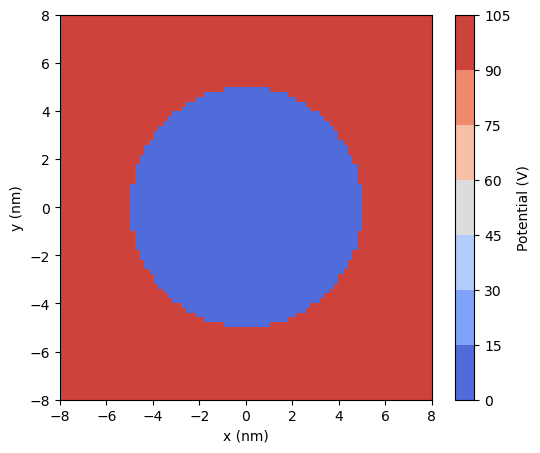

In [10]:
plt.style.use('default')
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(1, figsize = (6,5))
con = ax.contourf(xx, yy, bandedge, cmap = 'coolwarm')
cbar = plt.colorbar(con)
cbar.set_label('Potential (V)')
ax.set_xlabel('x (nm)')
ax.set_ylabel('y (nm)')

# plt.savefig('./Images/bandstructure.png', dpi = 2000)

In [11]:
bandedge1D = nn.DataFile(kp8Folder.go_to('bias_00000', 'bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'), product = software).variables['Band_Edge'].value
y = nn.DataFile(kp8Folder.go_to('bias_00000', 'bandedge_Gamma_1d_horizontal_slice_middle_along_y.dat'), product = software).coords['y'].value

Text(0, 0.5, 'Energy\\ (eV)')

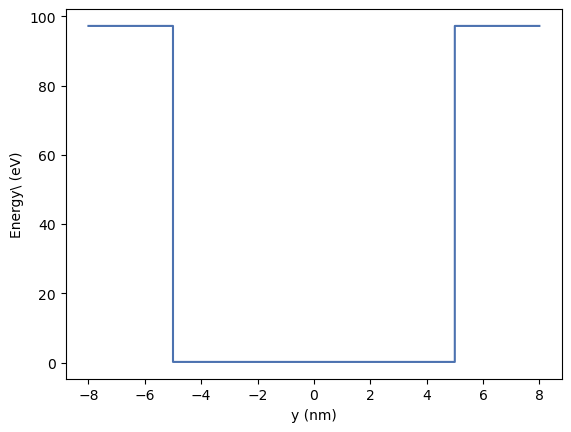

In [12]:
fig, ax = plt.subplots()
ax.plot(y, bandedge1D)
ax.set_xlabel('y (nm)')
ax.set_ylabel(r'Energy\ (eV)')

# plt.savefig('./Images/1dbandedge.png', dpi = 2000)

Combining the two plots into one

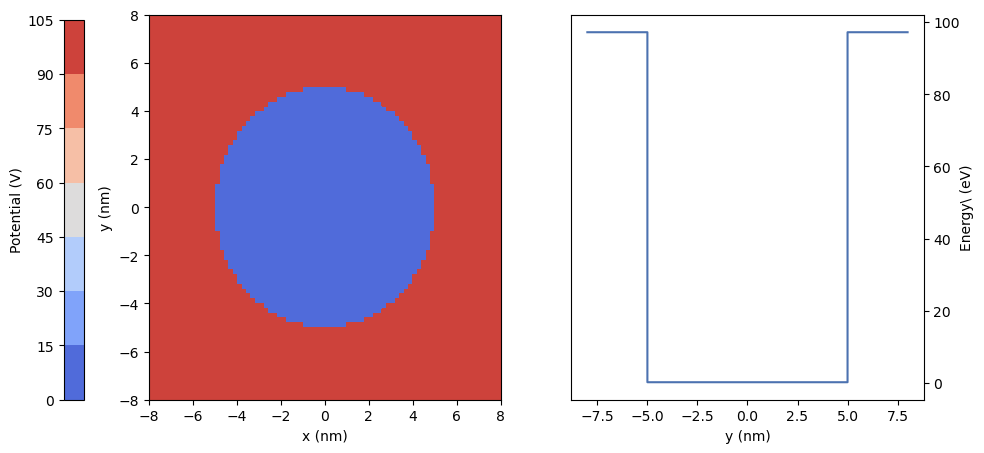

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
con = ax1.contourf(xx, yy, bandedge, cmap = 'coolwarm')
cbaxes = fig.add_axes([0.04, 0.11, 0.02, 0.76]) 
cbar = plt.colorbar(con, cax = cbaxes)
cbar.ax.yaxis.set_ticks_position('left')
cbar.set_label('Potential (V)', labelpad = -53)
ax1.set_xlabel('x (nm)')
ax1.set_ylabel('y (nm)')

ax2.plot(y, bandedge1D)
ax2.set_xlabel('y (nm)')
ax2.set_ylabel(r'Energy\ (eV)', loc = 'center', labelpad = -290)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.tick_right()

# plt.savefig('./Images/combinedBandedge.png', dpi = 2000)

## Absorbtion

In [14]:
nn.DataFile(kp8Folder.go_to('bias_00000', 'Optics', 'absorption_quantum_region_kp8_x_eV.dat'), product = software)

DataFile
fullpath: D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_kp8\bias_00000\Optics\absorption_quantum_region_kp8_x_eV.dat
Coordinates: 0 datasets
Variables: 2 datasets
	name: Energy - unit: eV - shape: (30001,)
	name: Absorption - unit: cm^-1 - shape: (30001,)

We want to plot the absorption for each polarisation direction, so we get the data for the x, y and z directions

In [15]:
E = nn.DataFile(kp8Folder.go_to('bias_00000', 'Optics', 'absorption_quantum_region_kp8_z_eV.dat'), product = software).variables['Energy'].value
aX = nn.DataFile(kp8Folder.go_to('bias_00000', 'Optics', 'absorption_quantum_region_kp8_x_eV.dat'), product = software).variables['Absorption'].value
aY = nn.DataFile(kp8Folder.go_to('bias_00000', 'Optics', 'absorption_quantum_region_kp8_y_eV.dat'), product = software).variables['Absorption'].value
aZ = nn.DataFile(kp8Folder.go_to('bias_00000', 'Optics', 'absorption_quantum_region_kp8_z_eV.dat'), product = software).variables['Absorption'].value

### Getting the peaks of absorption

We can use a <code>SciPy</code> package to find the peaks of the absorption spectrum. This will help us in identifying the eigenenergies for the bands. It is not stricly necessary to find the peaks using <code>SciPy</code>, but it will aid the plotting of graphs.

In [16]:
from scipy.signal import find_peaks

In [17]:
peaks, _ = find_peaks(aY, height = 0)
peaks

array([16751, 17032, 18056, 18106, 18282, 18824, 18957, 19194, 19713,
       20045, 20269, 20593, 21617, 21731, 22128, 22651, 23067, 23165,
       23548, 24107, 25036, 25329, 25585], dtype=int64)

Get the first peak value

In [18]:
aY[peaks][0]

5838.546

Get the highest peak

In [19]:
np.max(aY[peaks])

6600.994

Get the corresponding index


In [20]:
np.where(aY == np.max(aY[peaks]))

(array([20593], dtype=int64),)

In [21]:
E[peaks]

array([1.6751, 1.7032, 1.8056, 1.8106, 1.8282, 1.8824, 1.8957, 1.9194,
       1.9713, 2.0045, 2.0269, 2.0593, 2.1617, 2.1731, 2.2128, 2.2651,
       2.3067, 2.3165, 2.3548, 2.4107, 2.5036, 2.5329, 2.5585])

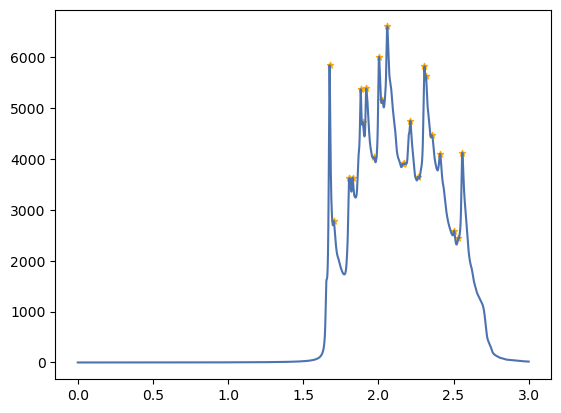

In [22]:
fig,ax = plt.subplots()
ax.plot(E, aX)
ax.scatter(E[peaks], aX[peaks], marker = '*',s = 20,color = 'orange')

### Plotting the absorption

We plot the polarisation for all directions onto a single graph, and then we identify the peaks of interest and find its corresponding energies on the x-axis.

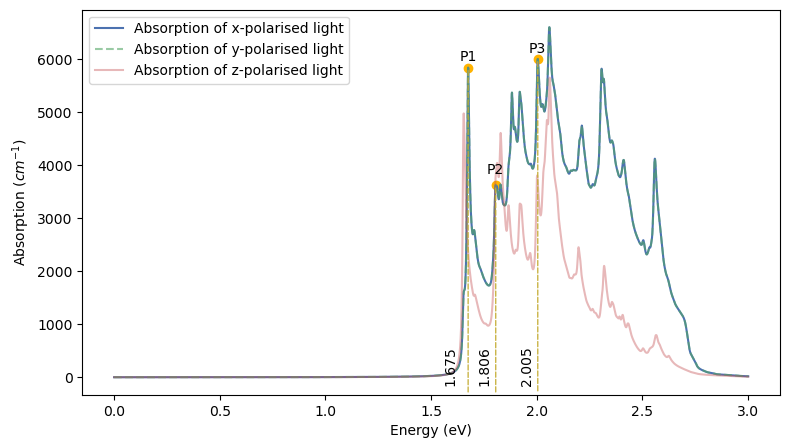

In [23]:
fig, ax = plt.subplots(1, figsize = (9,5))

ax.set_xlabel('Energy (eV)')
ax.set_ylabel(r'Absorption $(cm ^{-1})$')

##FIRST PEAK
# ax.axvline(E[peaks][0], ymax = 0.85, color = 'r', ls = '--')
# ax.text(E[peaks][0] - 0.03, +150, str(E[peaks][0]), transform = ax.transData, ha='right')
# ax.text(1.5, a[peaks][0] + 200, str(a[peaks][0]), transform = ax.transData)

ax1, = ax.plot(E, aX, alpha = 1)
ax2, = ax.plot(E, aY, '--', alpha = 0.6)
ax3, = ax.plot(E, aZ, alpha = 0.4)


temp = 0
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+200, 'P1', ha= 'center', va = 'center')
ax.text(E[peaks][temp]-0.05, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

temp = 2
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+300, 'P2', ha= 'center', va=  'center')
ax.text(E[peaks][temp]-0.02, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

temp = 9
ax.scatter(E[peaks[temp]], aX[peaks][temp], color = '#ffb300')
ax.annotate(text = '', xy = (E[peaks][temp], ax.get_ylim()[0]), xytext = (E[peaks][temp], aX[peaks][temp]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = '#c4ac33', alpha = 0.9))
ax.text(E[peaks][temp], aX[peaks][temp]+200, 'P3', ha= 'center', va = 'center')
ax.text(E[peaks][temp]-0.02, -100, str(round(E[peaks][temp],3)), ha = 'right', rotation = 90)

##Biggest peak
# ax.scatter(E[peaks][np.argmax(a[peaks])], a[peaks][np.argmax(a[peaks])], color = 'orange')
# ax.annotate(text = '', xy = (E[peaks][np.argmax(a[peaks])], ax.get_ylim()[0]), xytext = (E[peaks][np.argmax(a[peaks])], a[peaks][np.argmax(a[peaks])]), arrowprops = dict(arrowstyle = '-', linestyle = '--', color = 'red'))
# ax.text(E[np.where(a == np.max(a[peaks]))]+0.05, np.max(a[peaks]) - 100, str(np.max(a[peaks])),transform = ax.transData)
# ax.text(E[peaks][np.argmax(a[peaks])] - 0.02, -100, str(E[peaks][np.argmax(a[peaks])]), transform = ax.transData, rotation = 90, ha = 'right')


titles = []
l = ['x', 'y', 'z']
for item in l:
    titles.append('Absorption of '+str(item) +'-polarised light')

plt.legend([ax1, ax2, ax3], titles)
# plt.savefig('./Images/absorption.png', dpi = 2000)

We can identify the transitions that give us the energies in the graph above by analysing the <code>.txt</code> file that outputs the energies and the intensity of these transitions.

In [24]:
import pandas as pd

In [25]:
transitionsdata = kp8Folder.go_to('bias_00000', 'Optics', 'transitions_quantum_region_kp8_x.txt')
df = pd.read_csv(transitionsdata, delimiter = "\t\t")
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Energy[eV],From,To,Intensity_k0[eV],1/Radiative_Rate[s]
0,1.78801,1,16,0.094832,1.235590e-07
1,1.92504,1,17,2.851040,3.817310e-09
2,1.92587,1,18,0.373608,2.911770e-08
3,2.08454,1,19,0.718649,1.398530e-08
4,2.08653,1,20,0.002669,3.761660e-06


We want to find all transitions that has energies near P1 (1.675 eV). We use [operations on DataFrames](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) to identify the values of interest.

In [26]:
energyrange = 0.1
energycenter = 1.675
df1 = df[(df['Energy[eV]'] < (energycenter + energyrange)) & (df['Energy[eV]'] > (energycenter - energyrange))].sort_values(by = 'Energy[eV]').head(10000)
df1

highlight = lambda x : ['background: yellow' if (x.name == 180) else ('') for i in x]

df1.style.apply(highlight, axis = 1)

,Energy[eV],From,To,Intensity_k0[eV],1/Radiative_Rate[s]
210,1.651700,15,16,6.572610,0.000000
195,1.664760,14,16,0.805036,0.000000
180,1.674370,13,16,19.902100,0.000000
165,1.689080,12,16,0.023433,0.000001
150,1.701790,11,16,2.426480,0.000000
135,1.705430,10,16,0.318657,0.000000
120,1.726320,9,16,0.021924,0.000001
105,1.731540,8,16,0.282358,0.000000
90,1.744330,7,16,0.020254,0.000001
75,1.748420,6,16,0.103828,0.000000


We observe that the transition at P1 is from the 16th state (lowest conduction band) to the 14th state (2nd highest valence band). This is identified through the high <code>Intensity_k0</code> of $\sim$19 eV

We can conduct a similar analysis for the other peaks.

In [27]:
energycenter = 1.806
df1 = df[(df['Energy[eV]'] < (energycenter + energyrange)) & (df['Energy[eV]'] > (energycenter - energyrange)) ].sort_values(by = 'Energy[eV]').head(10000)
highlight = lambda x : ['background: yellow' if (x.name == 196) else ('') for i in x]

df1.style.apply(highlight, axis = 1)

,Energy[eV],From,To,Intensity_k0[eV],1/Radiative_Rate[s]
120,1.726320,9,16,0.021924,0.000001
105,1.731540,8,16,0.282358,0.000000
90,1.744330,7,16,0.020254,0.000001
75,1.748420,6,16,0.103828,0.000000
60,1.756880,5,16,0.018855,0.000001
45,1.761870,4,16,0.000015,0.000767
30,1.779830,3,16,0.001705,0.000007
15,1.780060,2,16,0.029742,0.000000
0,1.788010,1,16,0.094832,0.000000
211,1.788730,15,17,0.109733,0.000000


In [28]:
energycenter = 2.005
df1 = df[(df['Energy[eV]'] < (energycenter + energyrange)) & (df['Energy[eV]'] > (energycenter - energyrange)) & (df['Intensity_k0[eV]'] > 1)].sort_values(by = 'Energy[eV]').head(10000)

highlight = lambda x : ['background: yellow' if (x.name == 139 or x.name == 138) else ('') for i in x]

df1.style.apply(highlight, axis = 1)

,Energy[eV],From,To,Intensity_k0[eV],1/Radiative_Rate[s]
16,1.917090,2,17,10.003000,0.000000
1,1.925040,1,17,2.851040,0.000000
153,1.998320,11,19,1.322760,0.000000
154,2.000310,11,20,3.150590,0.000000
138,2.001960,10,19,5.991300,0.000000
139,2.003940,10,20,1.792270,0.000000
78,2.044950,6,19,1.956500,0.000000
155,2.055160,11,21,5.794630,0.000000
48,2.058400,4,19,1.017280,0.000000
140,2.058790,10,21,3.721900,0.000000


The highlighted values best match the peaks observed on the absorption against energy graph.

## Eigenvalues, transition energies and occupations

In [29]:
num = nn.DataFile(kp8Folder.go_to('bias_00000', 'Quantum', 'energy_spectrum_quantum_region_kp8_00000.dat'), product = software).variables['no.'].value
eigenE = nn.DataFile(kp8Folder.go_to('bias_00000', 'Quantum', 'energy_spectrum_quantum_region_kp8_00000.dat'), product = software).variables['Energy'].value

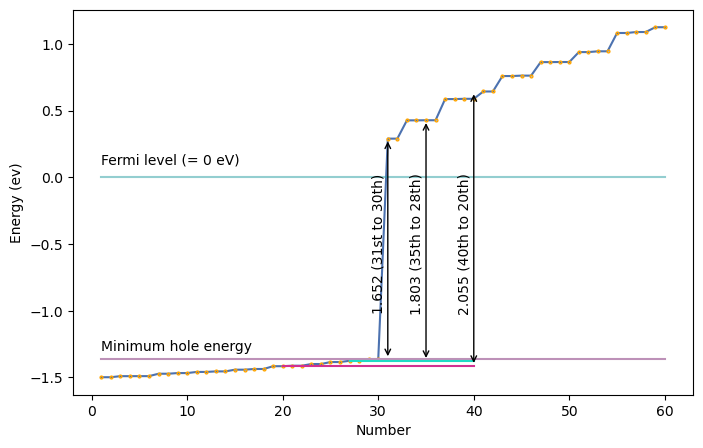

In [30]:
fig, ax = plt.subplots(1, figsize = (8,5))
ax.plot(num, eigenE, '-o', markerfacecolor = 'None', markeredgecolor = 'orange', ms = 2)

#plotting the zero line (fermi level)
zeros = np.zeros(np.size(num))
ax.plot(num, zeros, color = '#299fa3', alpha = 0.5)
ax.text(1, 0.1, 'Fermi level (= 0 eV)')

#plotting the minimum hole energy
minimum = np.zeros(np.size(num)) + eigenE[29]

ax.plot(num, minimum, color = '#bd91b8')
ax.text(1, -1.3, 'Minimum hole energy')

ax.set_xlabel('Number')
ax.set_ylabel('Energy (ev)')

xoffset = 1
ax.annotate(text = '', xy = (31, eigenE[31]), xytext = (31, eigenE[29]), arrowprops = dict(arrowstyle = '<->'))
ax.text(31 - xoffset, -0.5, str(round(eigenE[31] - eigenE[29],3)) + ' (31st to 30th)', rotation = 90, va = 'center', ha = 'center')

ax.annotate(text = '', xy = (35, eigenE[35]), xytext = (35, eigenE[27]), arrowprops = dict(arrowstyle = '<->'))
ax.text(35 - xoffset, -0.5, str(format(round(eigenE[35] - eigenE[27],3),'.3f')) + ' (35th to 28th)', rotation = 90, va = 'center', ha = 'center')
ax.plot([27, 40],[eigenE[27], eigenE[27]], color = '#1fdbc5', alpha = 1)

ax.annotate(text = '', xy = (40, eigenE[40]), xytext = (40, eigenE[20]), arrowprops = dict(arrowstyle = '<->'))
ax.text(40 - xoffset, -0.5, str(round(eigenE[40] - eigenE[20],3)) + ' (40th to 20th)', rotation = 90, va = 'center', ha = 'center')
ax.plot([20, 40],[eigenE[20], eigenE[20]], color = '#d13091', alpha = 1)


# plt.savefig('./Images/energy_levels.png', dpi = 2000)

## Occupation

Text(0, 0.5, 'Occupation probability')

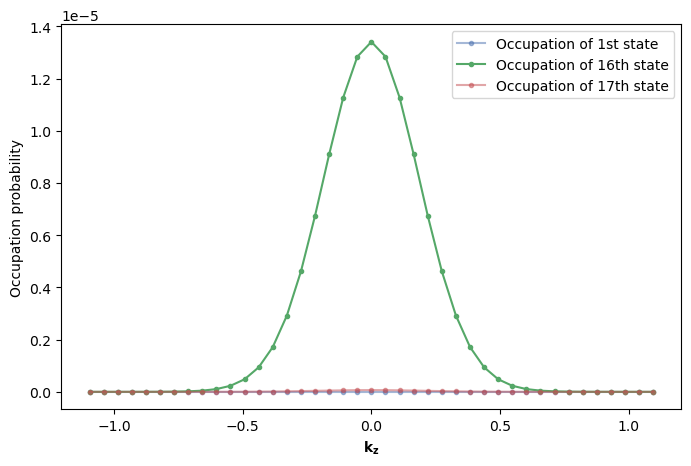

In [31]:
occu1 = nn.DataFile(kp8Folder.go_to('bias_00000', 'Optics', 'occupation_disp_quantum_region_kp8_1.dat'), product = software).variables['occupation'].value
occu2 = nn.DataFile(kp8Folder.go_to('bias_00000', 'Optics', 'occupation_disp_quantum_region_kp8_16.dat'), product = software).variables['occupation'].value
occu3 = nn.DataFile(kp8Folder.go_to('bias_00000', 'Optics', 'occupation_disp_quantum_region_kp8_17.dat'), product = software).variables['occupation'].value
kx = nn.DataFile(kp8Folder.go_to('bias_00000', "Optics", 'occupation_disp_quantum_region_kp8_16.dat'), product = software).variables['kx'].value

fig, ax = plt.subplots(1, figsize = (8,5))
markersize = 3
occuplt1,  = ax.plot(kx, occu1, '-o', markersize = markersize, alpha = 0.5)
occuplt2,  = ax.plot(kx, occu2, '-o', markersize = markersize)
occuplt3,  = ax.plot(kx, occu3, '-o', markersize = markersize, alpha = 0.5)

ax.legend([occuplt1, occuplt2, occuplt3], ['Occupation of 1st state', 'Occupation of 16th state', 'Occupation of 17th state'])

ax.set_xlabel(r'$\mathbf{k_z}$')
ax.set_ylabel('Occupation probability')
# plt.savefig('./Images/occupation.png', dpi = 2000)

## Eigenstates

To plot the eigenstates of the single band calculation, we use the variable <code>singlebanddata</code> instead. We want to visualise the eigenstates and wavefunction amplitudes in 3D. For this, we will require an additional package.

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

These files are chosen to find consecutive excited states. Degenerate states are skipped.

In [33]:
singleFolder = nn.DataFolder(inputfile_single.folder_output)

In [34]:
singleFolder.show_tree()

2Dcircular_infinite_well_GaAs_inter_singleband/
    bias_00000/
        Quantum/
            amplitudes_quantum_region_Gamma_00000.vtr
            amplitudes_quantum_region_Gamma_00000_1d_horizontal_slice_middle_along_y.dat
            amplitudes_quantum_region_Gamma_00000_1d_vertical_slice_middle_along_x.dat
            amplitudes_shift_quantum_region_Gamma_00000.vtr
            amplitudes_shift_quantum_region_Gamma_00000_1d_horizontal_slice_middle_along_y.dat
            amplitudes_shift_quantum_region_Gamma_00000_1d_vertical_slice_middle_along_x.dat
            dipole_moment_matrix_elements_quantum_region_Gamma_100.txt
            dipole_moment_matrix_elements_quantum_region_Gamma_100.vtr
            dipole_moment_oscillator_strengths_quantum_region_Gamma.txt
            dipole_moment_oscillator_strengths_quantum_region_Gamma.vtr
            dipole_moment_transition_energies_quantum_region_Gamma.txt
            dipole_moment_transition_energies_quantum_region_Gamma.vtr
            e

In [35]:
singleFolder.go_to('bias_00000', 'Quantum')

DataFolder
fullpath: D:\nextnano output\2Dcircular_infinite_well_GaAs_inter_singleband\bias_00000\Quantum
Folders: 0
Files:
['amplitudes_quantum_region_Gamma_00000.vtr', 'amplitudes_quantum_region_Gamma_00000_1d_horizontal_slice_middle_along_y.dat', 'amplitudes_quantum_region_Gamma_00000_1d_vertical_slice_middle_along_x.dat', 'amplitudes_shift_quantum_region_Gamma_00000.vtr', 'amplitudes_shift_quantum_region_Gamma_00000_1d_horizontal_slice_middle_along_y.dat', 'amplitudes_shift_quantum_region_Gamma_00000_1d_vertical_slice_middle_along_x.dat', 'dipole_moment_matrix_elements_quantum_region_Gamma_100.txt', 'dipole_moment_matrix_elements_quantum_region_Gamma_100.vtr', 'dipole_moment_oscillator_strengths_quantum_region_Gamma.txt', 'dipole_moment_oscillator_strengths_quantum_region_Gamma.vtr', 'dipole_moment_transition_energies_quantum_region_Gamma.txt', 'dipole_moment_transition_energies_quantum_region_Gamma.vtr', 'energy_spectrum_quantum_region_Gamma_00000.dat', 'intraband_matrix_elements_

In [36]:
ampData = nn.DataFile(singleFolder.go_to('bias_00000', 'Quantum', 'amplitudes_quantum_region_Gamma_00000.vtr'), product = software)

for i in range(1,7):
    exec(f'psi{i} = ampData.variables["Psi_{i}"].value')

In [37]:
eigenX = ampData.coords['x'].value
eigenY = ampData.coords['y'].value
XX, YY = np.meshgrid(eigenX, eigenY)

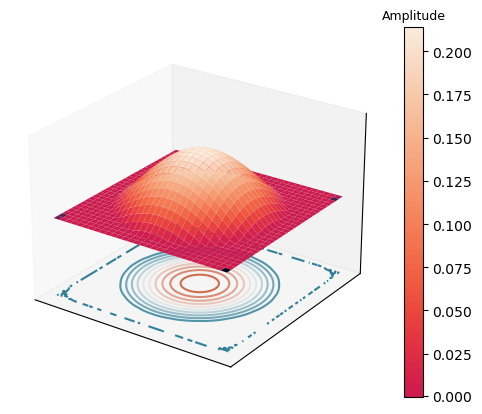

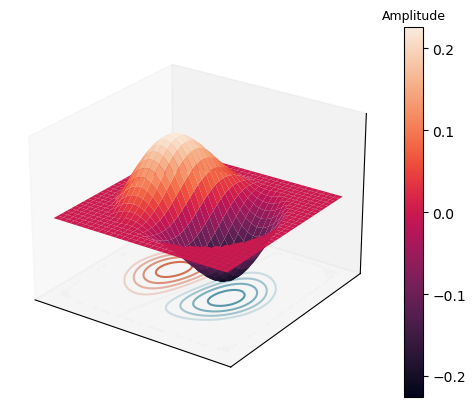

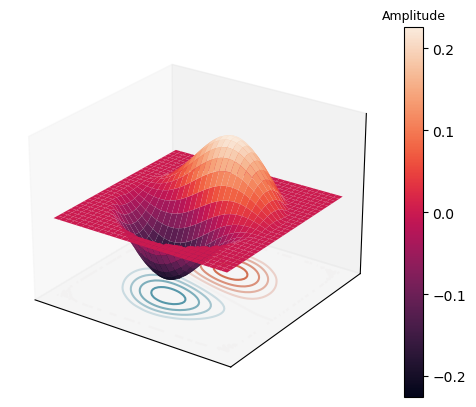

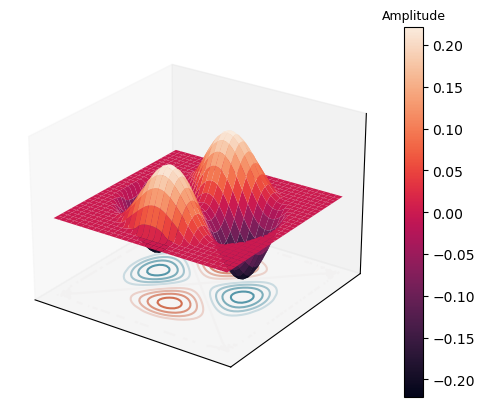

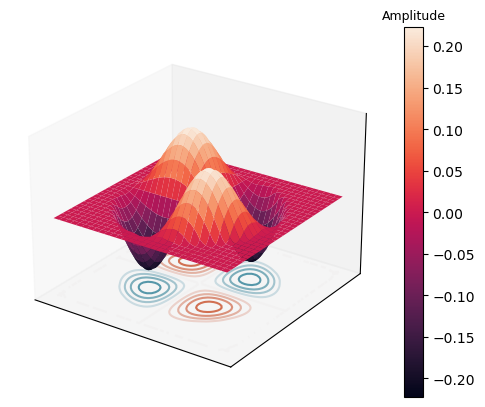

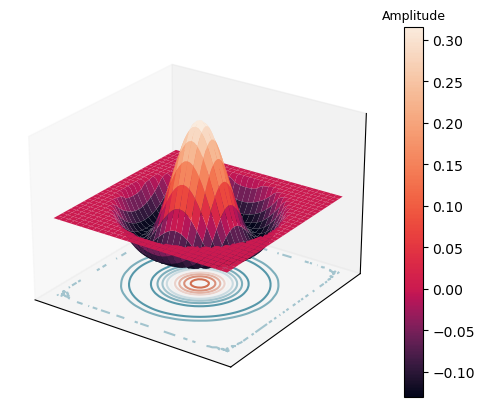

In [38]:
c1 = sns.color_palette("rocket", as_cmap=True)

offset = np.zeros(6) - 0.3
for i in range(1,7):
    divnorm = colors.TwoSlopeNorm(vcenter = 0)
    
    fig, ax = plt.subplots(subplot_kw = {'projection' : '3d'})
    exec(f'psi = psi{i}')
    surf = ax.plot_surface(XX, YY, psi, cmap = c1, norm = divnorm)
    cbar = plt.colorbar(surf)
    cbar.ax.set_title('Amplitude', fontsize = 9)
    ax.tick_params(labelbottom=False, labelleft=False)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.zaxis.set_ticks([])
    ax.view_init(25, 90+35)
    ax.set_zlim(-0.3,0.3)
    ax.contour(XX, YY, psi, 10, zdir = 'z', cmap=sns.diverging_palette(220, 20, s= 85,as_cmap=True), linestyles="solid", offset= offset[i-1])
#     plt.savefig(f'./Images/psi{i}.png', dpi = 2000)